In [ ]:
78import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#checking duplicates
df.duplicated().value_counts()

False    1470
dtype: int64

In [ ]:
#checking no of rows and columns
df.shape

(1470, 35)

In [ ]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df = df.drop(columns=['Education','EmployeeCount','EmployeeNumber'],axis=1)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,...,4,80,1,6,3,3,2,2,2,2


# Data visualization

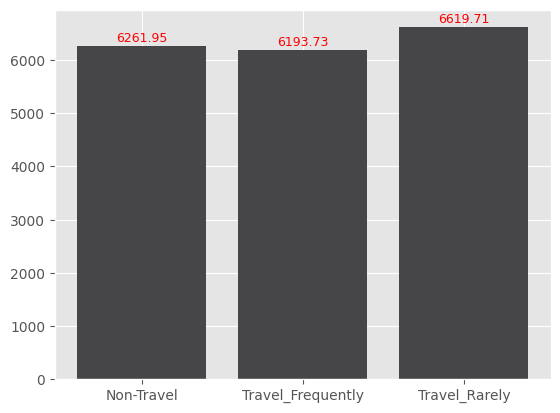

In [ ]:
income_by_travel = df.groupby('BusinessTravel')['MonthlyIncome'].mean().reset_index()
barplot=plt.bar(x=income_by_travel['BusinessTravel'],height=income_by_travel['MonthlyIncome'],color=['#464648'])
plt.bar_label(barplot,label_type='edge',padding=1,fontsize=9,color='r')
plt.show()

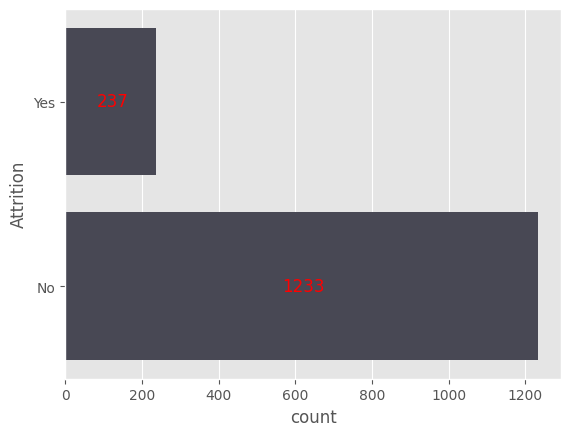

In [ ]:
countplot=sns.countplot(df['Attrition'],color='#464656')
plt.bar_label(countplot.containers[0],label_type='center',padding=1,fontsize=12,color='r')
plt.show()

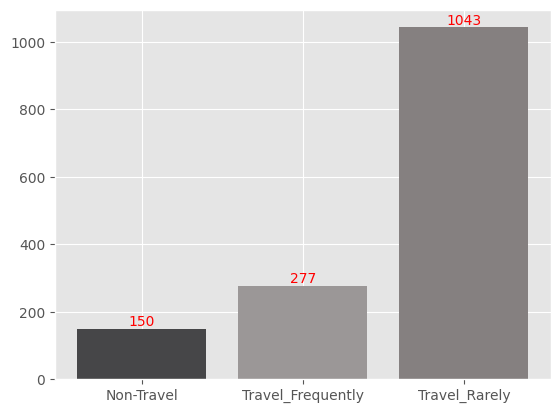

In [ ]:
count_att=df.groupby('BusinessTravel')['Attrition'].count().reset_index()
plot1=plt.bar(x=count_att['BusinessTravel'],height=count_att['Attrition'],color=['#464648','#9b9797','#858080'])
plt.bar_label(plot1,label_type='edge',color='r')
plt.show()

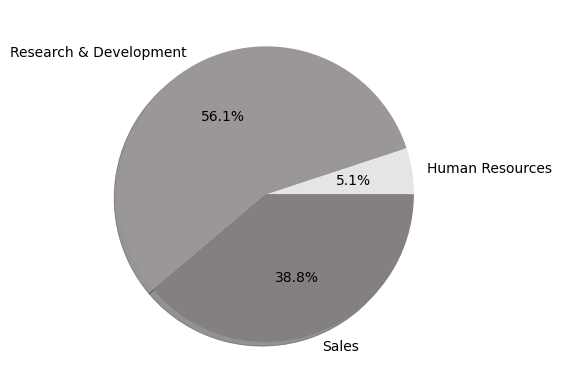

In [ ]:
plt.style.use('ggplot')
dept_count = df[df['Attrition'] == 'Yes'].groupby('Department')['Attrition'].count().reset_index()
pieplot=plt.pie(dept_count['Attrition'],labels=dept_count['Department'],autopct='%1.1f%%',
        colors=['#e6e5e5','#9b9797','#858080'],shadow=True)
plt.show()

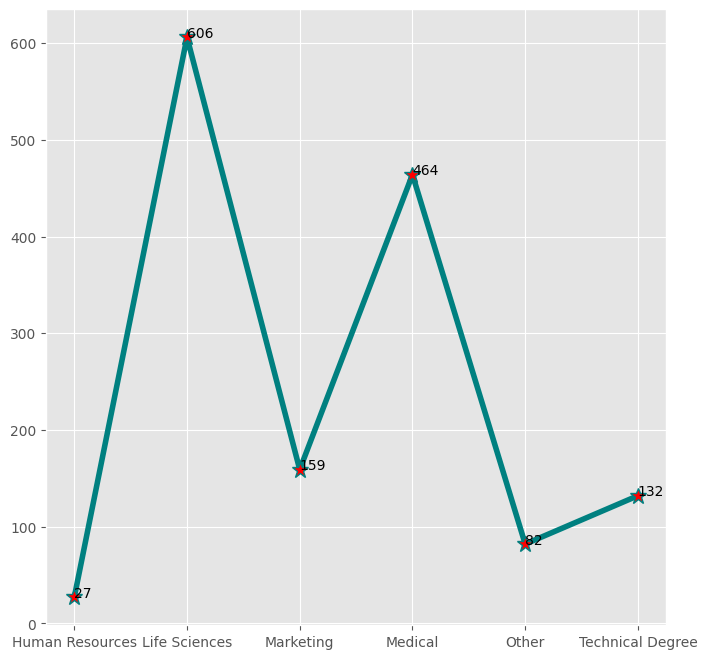

In [ ]:
plt.figure(figsize=(8,8))
education_count = df.groupby('EducationField')['Attrition'].count().reset_index()
piechart=plt.plot(education_count['EducationField'],education_count['Attrition'],linewidth=4,
         color='#008080',marker="*",ms=12, mfc = 'r',label=education_count['Attrition'])
for index, row in education_count.iterrows():
  plt.text(index,row['Attrition'],str(row['Attrition']))
plt.show()

In [ ]:
count1 = df[df['Attrition'] == 'Yes'].groupby('Gender')['Attrition'].count().reset_index()
print(count1)

# label encoding

In [ ]:
#label encoding Business  travel column
#Travel Rarely ---> 1,Travel Frequently ---> 2 and non-travel ---> 0
df['BusinessTravel']=df['BusinessTravel'].replace({'Travel_Rarely':1,'Travel_Frequently':2,'Non-Travel':0})

In [ ]:
#label encoding department column
#Research & Development ---> 1,Sales ---> 2,Human Resources---> 3
df['Department'] = df['Department'].replace({'Research & Development':1,'Sales':2,'Human Resources':3})

In [ ]:
#label endcoding on education field column
#Life Sciences --> 0,Medical -->1,Marketing-->2,Technical Degree-->3,Human Resources-->4,Other-->5
df['EducationField']=df['EducationField'].replace({'Life Sciences':0,'Medical':1,'Marketing':2,'Technical Degree':3,
                                                   'Human Resources':4,'Other':5})

In [ ]:
#label encoding gender column
#male-->1,female-->0
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})

In [ ]:
#label encoding job role column
df['JobRole'] = df['JobRole'].replace({'Sales Executive':0,'Research Scientist':1,'Laboratory Technician':2,
                                       'Manufacturing Director':3,'Healthcare Representative':4,'Manager':5,
                                       'Sales Representative':6,'Research Director':7,'Human Resources':8})

In [ ]:
#label encoding marital status
#Married --> 1 Divorced--> 2 single --> 0
df['MaritalStatus'] = df['MaritalStatus'].replace({'Married':1,'Divorced':2,'Single':0})

In [ ]:
#label encoding over 18
df['Over18'] = df['Over18'].replace({'Y':1})

In [ ]:
df['OverTime']=df['OverTime'].replace({'Yes':1,'No':0})

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,1102,2,1,0,2,0,94,...,1,80,0,8,0,1,6,4,0,5
1,49,No,2,279,1,8,0,3,1,61,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1,1373,1,2,5,4,1,92,...,2,80,0,7,3,3,0,0,0,0
3,33,No,2,1392,1,3,0,4,0,56,...,3,80,0,8,3,3,8,7,3,0
4,27,No,1,591,1,2,1,1,1,40,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#yes =df[df['Attrition'] == 'Yes']

In [ ]:
#No = df[df['Attrition'] == 'No']

In [ ]:
#df['Attrition'].value_counts()

In [ ]:
#no_sample = No.sample(n=300)

In [ ]:
#df=pd.concat([yes,no_sample])

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,1102,2,1,0,2,0,94,...,1,80,0,8,0,1,6,4,0,5
1,49,No,2,279,1,8,0,3,1,61,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1,1373,1,2,5,4,1,92,...,2,80,0,7,3,3,0,0,0,0
3,33,No,2,1392,1,3,0,4,0,56,...,3,80,0,8,3,3,8,7,3,0
4,27,No,1,591,1,2,1,1,1,40,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [ ]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,0,2,0,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,2,279,1,8,0,3,1,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,5,4,1,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,2,1392,1,3,0,4,0,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,1,591,1,2,1,1,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [ ]:
scaler=StandardScaler()

In [ ]:
x_standard = scaler.fit_transform(x)

In [ ]:
print(x_standard)

[[ 0.4463504  -0.16239918  0.74252653 ... -0.0632959  -0.67914568
   0.24583399]
 [ 1.32236521  1.71733935 -1.2977746  ...  0.76499762 -0.36871529
   0.80654148]
 [ 0.008343   -0.16239918  1.41436324 ... -1.16768726 -0.67914568
  -1.15593471]
 ...
 [-1.08667552 -0.16239918 -1.60518328 ... -0.61549158 -0.67914568
  -0.31487349]
 [ 1.32236521  1.71733935  0.54667746 ...  0.48889978 -0.67914568
   1.08689522]
 [-0.32016256 -0.16239918 -0.43256792 ... -0.33939374 -0.36871529
  -0.59522723]]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_standard,y,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1176, 31)
(294, 31)


In [ ]:
print(x_train)

[[ 0.008343   -0.16239918  1.41188414 ...  2.14548682  0.8730063
   0.80654148]
 [ 0.88435781 -2.04213771  0.97308304 ...  1.04109546  2.73558868
   1.08689522]
 [-0.97717366 -0.16239918  0.87887716 ... -0.61549158 -0.05828489
  -0.59522723]
 ...
 [ 0.77485596 -0.16239918  0.76731756 ... -0.61549158 -0.67914568
  -0.59522723]
 [-0.53916626 -0.16239918  0.31364185 ...  0.76499762 -0.67914568
   1.08689522]
 [ 1.32236521 -0.16239918 -0.83914069 ... -0.61549158 -0.05828489
  -0.59522723]]


In [ ]:
print(x_test)

[[ 1.43186707 -0.16239918  0.33843287 ...  1.86938898 -0.36871529
   0.24583399]
 [-1.19617737 -0.16239918  1.44163336 ...  0.76499762 -0.67914568
   0.80654148]
 [ 1.65087077  1.71733935  0.21695686 ...  1.04109546 -0.67914568
  -1.15593471]
 ...
 [-1.30567922 -0.16239918  1.41188414 ... -0.61549158 -0.36871529
  -0.59522723]
 [ 2.30788188 -2.04213771 -1.02259425 ... -0.33939374 -0.36871529
  -0.59522723]
 [ 0.2273467   1.71733935  1.03010239 ...  1.04109546 -0.36871529
   0.52618774]]


In [ ]:
print(y_train)

285      No
194      No
323     Yes
1015     No
1003     No
       ... 
466      No
299      No
493      No
527      No
1192     No
Name: Attrition, Length: 1176, dtype: object


In [ ]:
print(y_test)

721     No
843     No
627     No
1368    No
305     No
        ..
61      No
498     No
993     No
308     No
400     No
Name: Attrition, Length: 294, dtype: object


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#accuracy
x_train_prediction = model.predict(x_train)

training_accuracy = accuracy_score(x_train_prediction,y_train)

print(training_accuracy)

0.8869047619047619


In [ ]:
x_test_prediction = model.predict(x_test)

testing_accuracy = accuracy_score(x_test_prediction,y_test)

print(testing_accuracy)

0.8707482993197279


In [ ]:
input_data = x_test[67]
numpy=np.asarray(input_data)
reshape_data=numpy.reshape(1,-1)
std_data=scaler.fit_transform(reshape_data)
prediction = model.predict(std_data)
print(prediction)

['No']
